# Decision Trees Classifier

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import pickle
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

sns.set()

plt.rc('legend',fontsize=13)
plt.rc('axes',labelsize=15)
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

2022-09-17 14:46:06.735528: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-17 14:46:06.735551: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def tree(data_set, max_depth_values=(None,), min_samples_split_values=(2,), training_sizes=(-1,)):
	x_train, y_train, x_test, y_test = get_data(data_set=data_set, batch_format="sklearn")
	max_depth_values = list(max_depth_values)
	min_samples_split_values = list(min_samples_split_values)
	data = []
	data_dict = {}
	for max_depth in max_depth_values:
		data_dict[max_depth] = {}
		for min_samples_split in min_samples_split_values:
			data_dict[max_depth][min_samples_split] = {}
			for train_limit in training_sizes:
				clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=None, class_weight="balanced")
				clf.fit(X=np.array(x_train[:train_limit]), y=np.array(y_train[:train_limit]))
				train_score = clf.score(X=np.array(x_train[:train_limit]), y=np.array(y_train[:train_limit]))
				test_score = clf.score(X=x_test, y=y_test)
				data.append((test_score, train_score, max_depth, min_samples_split, train_limit))
				data_dict[max_depth][min_samples_split][train_limit] = {'score': test_score, 'train_score': train_score}
	data_frame = pd.DataFrame(data, columns=["score", "train_score", "max_depth", "min_sample_split", "train_size"])
	data_dict_indexes = {'max_depth': 0, 'min_samples_split': 1, 'train_limit': 2, 'score_type': 3}
	return data_frame, data_dict, data_dict_indexes

def run(data_set_name):
	if data_set_name == "creditcard":
		df, dd, ddi = tree(data_set_name,
						   max_depth_values=list(range(1, 10, 2)) + list(range(10, 41, 10)),
						   min_samples_split_values=range(2, 18, 5),
						   training_sizes=range(10000, 210001, 50000))
	elif data_set_name == "starcraft":
		df, dd, ddi = tree(data_set_name,
						   max_depth_values=list(range(1, 21, 5)) + list(range(23, 36, 2)) + [37, 40, 45],
						   min_samples_split_values=range(2, 23, 5),
						   training_sizes=range(500, 2001, 500))
	else:
		print("unknow dataset:", data_set_name)
		exit(2)
	if not os.path.exists("../stats"):
		os.makedirs("../stats")
	df.to_csv(path_or_buf="../stats/tree_" + data_set_name + ".csv")
	with open("../stats/tree_" + data_set_name + "_dict.pikle", 'wb') as handle:
		pickle.dump(dd, handle, protocol=pickle.HIGHEST_PROTOCOL)
	with open("../stats/tree_" + data_set_name + "_dict_indexes.pikle", 'wb') as handle:
		pickle.dump(ddi, handle, protocol=pickle.HIGHEST_PROTOCOL)
	
# run(data_set_name="creditcard")
# run(data_set_name="starcraft")


Selected data set is creditcard with 213841 data (train: 213605 , test: 236 )
Selected data set is starcraft with 3034 data (train: 1950 , test: 1084 )


## Creditcard dataset

In [7]:
data_set_name = "creditcard"
with open("../stats/tree_" + data_set_name + "_dict.pikle", 'rb') as handle:
	dd = pickle.load(handle)
with open("../stats/tree_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
	ddi = pickle.load(handle)

In [8]:
print(ddi)

{'max_depth': 0, 'min_samples_split': 1, 'train_limit': 2, 'score_type': 3}


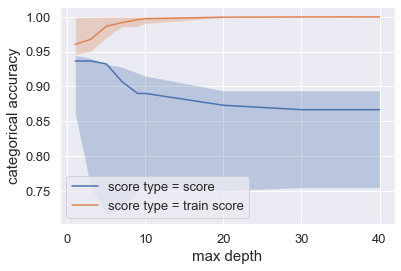

In [9]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
	consolidate_argy=y_arg_id, argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=None
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/tree_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

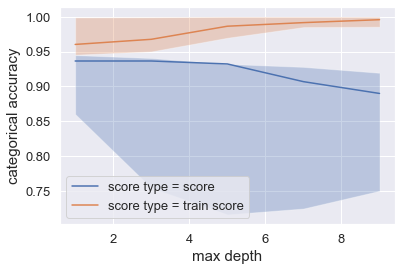

In [10]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
	consolidate_argy=y_arg_id, argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['max_depth'], list(range(1,10,2)))]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/tree_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+"_zoom.png")
plt.show()

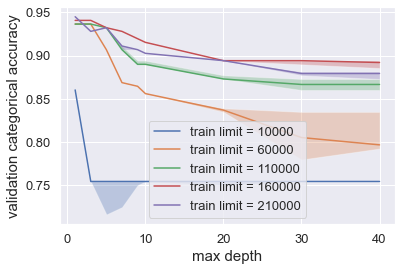

In [11]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
	consolidate_argy=y_arg_id, argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], 'score')]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/tree_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

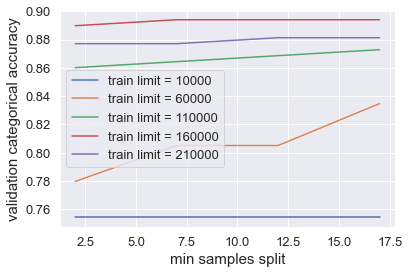

In [12]:
x_arg_name = 'min_samples_split'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddi[x_arg_name]
y_arg_id = ddi[y_arg_name]
z_arg_id = ddi[z_arg_name]

cd = consolidate_dict_data(
	dd, consolidate_argx=x_arg_id, argx_name=x_arg_name,
	consolidate_argy=y_arg_id, argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddi['score_type'], 'score'), (ddi['max_depth'], 30)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/tree_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

## Starcraft dataset

In [13]:
data_set_name = "starcraft"
with open("../stats/tree_" + data_set_name + "_dict.pikle", 'rb') as handle:
	dds = pickle.load(handle)
with open("../stats/tree_" + data_set_name + "_dict_indexes.pikle", 'rb') as handle:
	ddis = pickle.load(handle)

In [14]:
print(ddi)

{'max_depth': 0, 'min_samples_split': 1, 'train_limit': 2, 'score_type': 3}


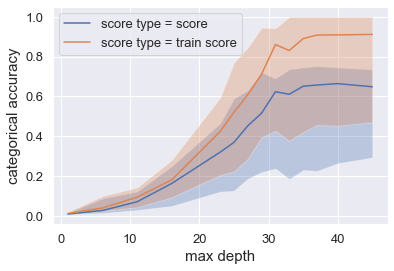

In [15]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddis[x_arg_name]
y_arg_id = ddis[y_arg_name]
z_arg_id = ddis[z_arg_name]

cd = consolidate_dict_data(
	dds, consolidate_argx=x_arg_id, argx_name=x_arg_name,
	consolidate_argy=y_arg_id, argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=None
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'),  label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/tree_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

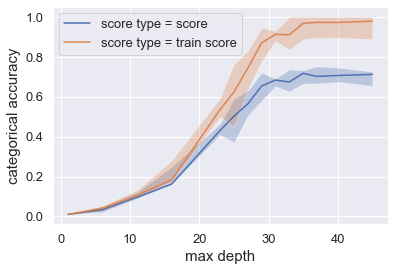

In [16]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'score_type'

x_arg_id = ddis[x_arg_name]
y_arg_id = ddis[y_arg_name]
z_arg_id = ddis[z_arg_name]

cd = consolidate_dict_data(
	dds, consolidate_argx=x_arg_id, argx_name=x_arg_name,
	consolidate_argy=y_arg_id, argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddis['train_limit'], 2000)]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/tree_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+"_train_score2000.png")
plt.show()

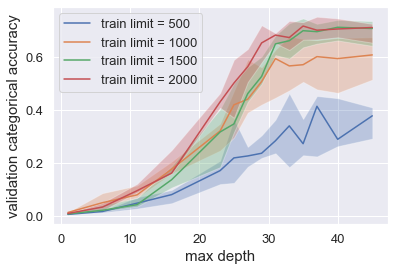

In [17]:
x_arg_name = 'max_depth'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddis[x_arg_name]
y_arg_id = ddis[y_arg_name]
z_arg_id = ddis[z_arg_name]

cd = consolidate_dict_data(
	dds, consolidate_argx=x_arg_id, argx_name=x_arg_name,
	consolidate_argy=y_arg_id, argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddis['score_type'], 'score')]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/tree_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()

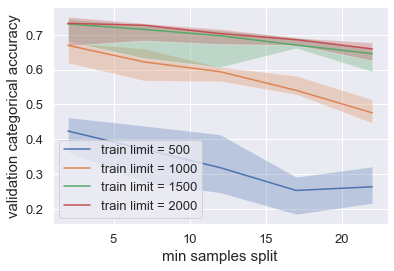

In [18]:
x_arg_name = 'min_samples_split'
y_arg_name = 'score_type'
z_arg_name = 'train_limit'

x_arg_id = ddis[x_arg_name]
y_arg_id = ddis[y_arg_name]
z_arg_id = ddis[z_arg_name]

cd = consolidate_dict_data(
	dds, consolidate_argx=x_arg_id, argx_name=x_arg_name,
	consolidate_argy=y_arg_id, argy_name=y_arg_name,
	consolidate_argz=z_arg_id,
	filters=[(ddis['score_type'], 'score'), (ddis['max_depth'], range(30, 50, 1))]
)
plt.figure()
for a, d in cd.items():
	plt.plot(d.get(x_arg_name),d.get('median'), label=z_arg_name.replace('_',' ') + ' = ' + str(a).replace('_',' '))
	plt.fill_between(d.get(x_arg_name), d.get('min'), d.get('max'), alpha=0.3)
plt.ylabel('validation categorical accuracy')
plt.xlabel(x_arg_name.replace('_',' '))
plt.legend()
plt.savefig("../graphics/tree_"+data_set_name+"_"+x_arg_name+"_"+y_arg_name+"_"+z_arg_name+".png")
plt.show()